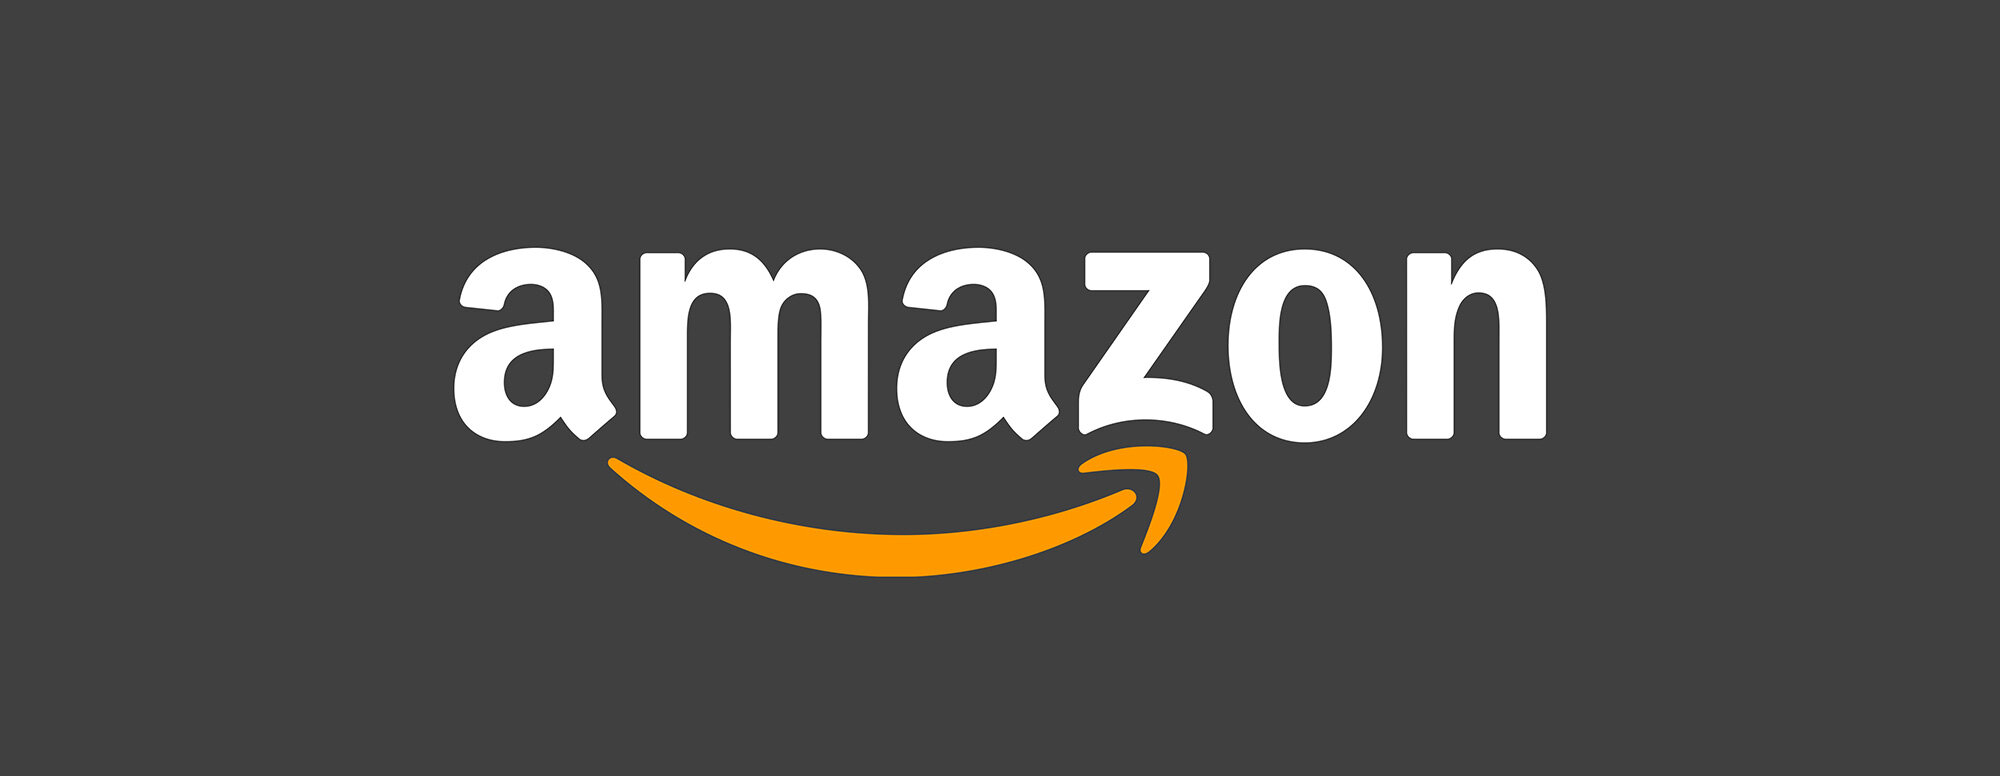

# Amazon Sales Data: EDA & Recommendation System

### Table of Contents

* [Introduction](#introduction)
* [Data Source](#data_source)
* [Importing Libraries](#importing_libraries)
* [Data Acquisition](#data_acquisition)
* [Data Description](#data_description)
* [Initial Data Assessment](#data_assessment)
    * [Searching for Null Values](#nulls)
    * [Searching for Duplicates](#duplicates)
    * [Converting Data Formats](#data_formats)
* [Exploring Categories](#categories)
    * [Most Popular Category & Subcategory](#pop_cat)
* [Setting up a Recommendation System](#recs)
* [Conclusions](#conclusions)

# Introduction <a class="anchor" id="introduction"></a>

In this project we'll be performing an exploratory data analysis of Amazon sales data.  
Amazon is an American multinational technology company, engaged in e-commerce, cloud computing, online advertising, digital streaming, and artificial intelligence. It is considered one of the Big Five American technology companies. 

# Data Source <a class="anchor" id="data_source"></a>

The dataset is available on Kaggle at this [link](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset/data)

# Importing Libraries <a class="anchor" id="importing_libraries"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

# Data Acquisition <a class="anchor" id="data_acquisition"></a>

In [2]:
df = pd.read_csv('amazon.csv', sep=',')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# Data Description <a class="anchor" id="data_description"></a>

**product_id** - product ID  
**product_name** - product name  
**category** - product category   
**discounted_price** - product price with a discount  
**actual_price** - product price with no discount  
**discount_percentage** - discount  
**rating** - product rating  
**rating_count** - number of rates  
**about_product** - product description  
**user_id** - user ID   
**user_name** - user name  
**review_id** - review ID  
**review_title** - review title  
**review_content** - review text  
**img_link** - link to the image  
**product_link** - link to the product

# Initial Data Assessment <a class="anchor" id="data_assessment"></a>

In [3]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [4]:
df.shape

(1465, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

Note: **discounted_price**, **actual_price**, **discount percentage** need to be converted into float 

### Searching for Null Values <a class="anchor" id="nulls"></a>

In [6]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

There are 2 NaN records in the rating_count column:

In [7]:
df[df['rating_count'].isna()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


We will drop these records:

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

### Searching for Duplicates <a class="anchor" id="duplicates"></a>

In [10]:
df.duplicated().sum()

0

There are no duplicate values in the dataset

### Converting Data Formats <a class="anchor" id="data_formats"></a>

In [11]:
df['discounted_price'] = df['discounted_price'].str.replace('₹', '')
df['discounted_price'] = df['discounted_price'].str.replace(',', '')
df['discounted_price'] = df['discounted_price'].astype('float64')

In [12]:
df['actual_price'] = df['actual_price'].str.replace('₹', '')
df['actual_price'] = df['actual_price'].str.replace(',', '')
df['actual_price'] = df['actual_price'].astype('float64')

In [13]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')
df['discount_percentage'] = df['discount_percentage'].astype('float64')
df['discount_percentage'] = df['discount_percentage']/100

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1463 non-null   object 
 1   product_name         1463 non-null   object 
 2   category             1463 non-null   object 
 3   discounted_price     1463 non-null   float64
 4   actual_price         1463 non-null   float64
 5   discount_percentage  1463 non-null   float64
 6   rating               1463 non-null   object 
 7   rating_count         1463 non-null   object 
 8   about_product        1463 non-null   object 
 9   user_id              1463 non-null   object 
 10  user_name            1463 non-null   object 
 11  review_id            1463 non-null   object 
 12  review_title         1463 non-null   object 
 13  review_content       1463 non-null   object 
 14  img_link             1463 non-null   object 
 15  product_link         1463 non-null   o

There is an anomalous value in the rating column:

In [15]:
df['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [16]:
df[df['rating']=='|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


We're going to have to drop it as well:

In [17]:
df = df.drop(df[df['rating']=='|'].index)

In [18]:
df[df['rating']=='|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


# Exploring Categories <a class="anchor" id="categories"></a>

In [19]:
df['category'].unique()

array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

Category names look really inconvenient so we will extract product category and subcategory from the category columns

In [20]:
df['product_category'] = df['category'].str.split('|').str.get(0)
df['product_category'].unique()

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

In [21]:
df['product_subcategory'] = df['category'].str.split('|').str.get(1)
df['product_subcategory'].unique()

array(['Accessories&Peripherals', 'NetworkingDevices',
       'HomeTheater,TV&Video', 'HomeAudio', 'WearableTechnology',
       'Mobiles&Accessories', 'Accessories',
       'Headphones,Earbuds&Accessories', 'ExternalDevices&DataStorage',
       'Microphones', 'GeneralPurposeBatteries&BatteryChargers',
       'OfficePaperProducts', 'CraftMaterials', 'Cameras&Photography',
       'OfficeElectronics', 'Printers,Inks&Accessories', 'Monitors',
       'Components', 'Electrical', 'Arts&Crafts', 'PowerAccessories',
       'Tablets', 'Laptops', 'Kitchen&HomeAppliances',
       'Heating,Cooling&AirQuality', 'Kitchen&Dining',
       'HomeStorage&Organization', 'CarAccessories',
       'HomeMedicalSupplies&Equipment'], dtype=object)

## Most Popular Category & Subcategory <a class="anchor" id="pop_cat"></a>

In [22]:
df.groupby('product_category', as_index=False)['product_id'].count().sort_values(by = 'product_id', ascending=False)

,product_category,product_id
2,Electronics,526
1,Computers&Accessories,451
4,Home&Kitchen,447
7,OfficeProducts,31
5,HomeImprovement,2
6,MusicalInstruments,2
0,Car&Motorbike,1
3,Health&PersonalCare,1
8,Toys&Games,1


Text(0.5, 1.0, 'No of orders by product category')

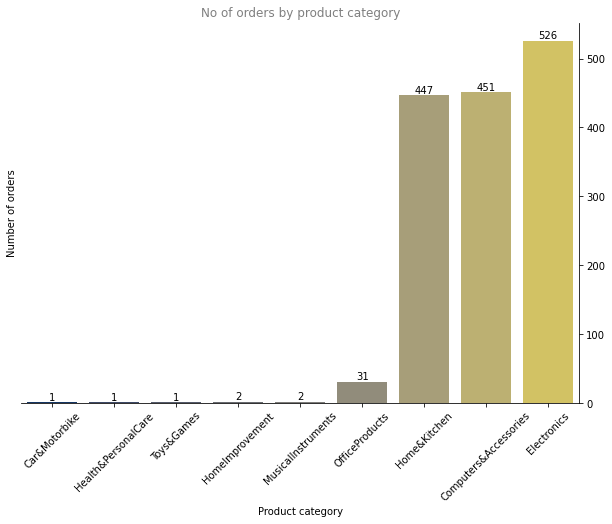

In [49]:
cat_count = df.groupby('product_category', as_index=False)['product_id'].count().reset_index()

fig = plt.figure(figsize=(10,7))

ax = sns.barplot(data = cat_count, x = 'product_category', y = 'product_id', palette='cividis', order=cat_count.sort_values('product_id').product_category)

plt.xticks(rotation=45)

ax.set_xlabel('Product category')
ax.set_ylabel('Number of orders')

sns.despine(left=True, right=False) 

for i in ax.containers:
    ax.bar_label(i,)

plt.title('No of orders by product category', color = 'gray')

The most popular category is **Electronics**.

In [24]:
subcat_count = df.groupby('product_subcategory')['product_id'].count().sort_values(ascending=False).reset_index().head(10)
subcat_count

,product_subcategory,product_id
0,Accessories&Peripherals,379
1,Kitchen&HomeAppliances,307
2,"HomeTheater,TV&Video",162
3,Mobiles&Accessories,161
4,"Heating,Cooling&AirQuality",116
5,WearableTechnology,76
6,"Headphones,Earbuds&Accessories",66
7,NetworkingDevices,34
8,OfficePaperProducts,27
9,ExternalDevices&DataStorage,18


Text(0.5, 1.0, 'No of orders by product subcategory')

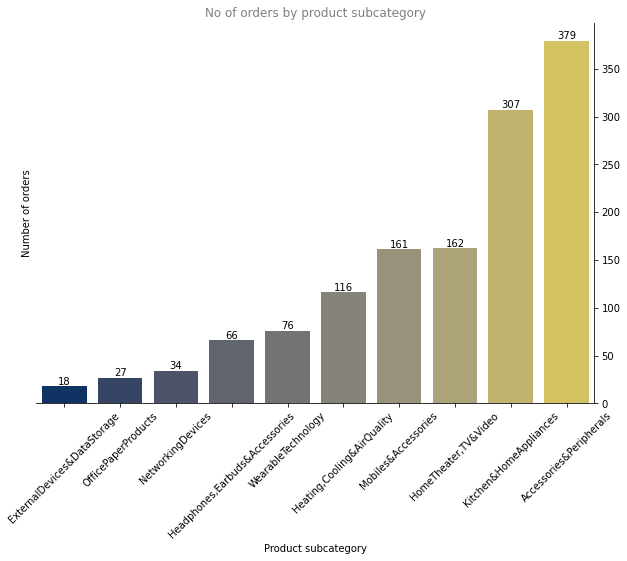

In [50]:
fig = plt.figure(figsize=(10,7))

ax = sns.barplot(data = subcat_count, x = 'product_subcategory', y = 'product_id', palette='cividis', order=subcat_count.sort_values('product_id').product_subcategory)

plt.xticks(rotation=45)

ax.set_xlabel('Product subcategory')
ax.set_ylabel('Number of orders')

sns.despine(left=True, right=False) 

for i in ax.containers:
    ax.bar_label(i,)

plt.title('No of orders by product subcategory', color = 'gray')

The most popular subcategory is **Accessories&Peripherals**.

In [26]:
df.groupby('product_category')[('actual_price', 'discounted_price')].mean().sort_values(by='actual_price', ascending=False).round(2)

C:\Users\HP\AppData\Local\Temp\ipykernel_4196\4107810190.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('product_category')[('actual_price', 'discounted_price')].mean().sort_values(by='actual_price', ascending=False).round(2)


,actual_price,discounted_price
product_category,,
Electronics,10127.31,5965.89
Home&Kitchen,4165.79,2331.13
Car&Motorbike,4000.00,2339.00
Health&PersonalCare,1900.00,899.00
Computers&Accessories,1686.66,845.39
MusicalInstruments,1347.00,638.00
HomeImprovement,799.00,337.00
OfficeProducts,397.19,301.58
Toys&Games,150.00,150.00


The category with the highest average of both actual and discounted price is **Electronics**.

In [27]:
df.groupby('product_subcategory')[('actual_price', 'discounted_price')].mean().sort_values(by='actual_price', ascending=False).round(2).head(15)

C:\Users\HP\AppData\Local\Temp\ipykernel_4196\2826794268.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('product_subcategory')[('actual_price', 'discounted_price')].mean().sort_values(by='actual_price', ascending=False).round(2).head(15)


,actual_price,discounted_price
product_subcategory,,
Laptops,59890.00,37247.00
Tablets,37999.00,26999.00
"HomeTheater,TV&Video",17235.69,10407.12
Monitors,16430.00,8199.00
Mobiles&Accessories,9754.50,7134.05
WearableTechnology,8554.76,2339.70
"Heating,Cooling&AirQuality",5908.98,3222.32
ExternalDevices&DataStorage,4303.06,2151.39
CarAccessories,4000.00,2339.00


The subcategory with the highest average of both actual and discounted price is **Laptops**.

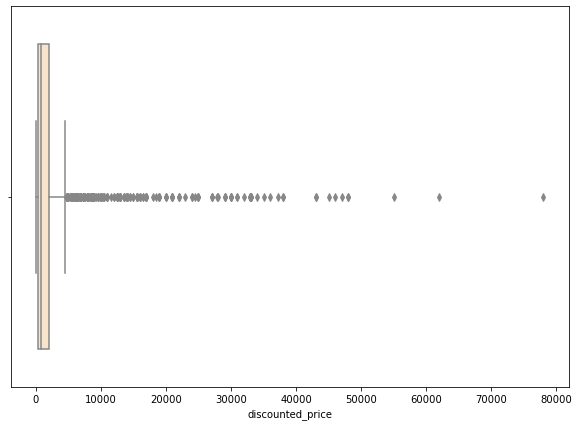

In [28]:
f = plt.figure(figsize=(10, 7))

ax = sns.boxplot(data = df, x = 'discounted_price', color = 'bisque')

There are quite a few outliers when it comes to the discounted price

In [29]:
df.sort_values(by='discounted_price', ascending=False)['product_subcategory'][:10]

249           HomeTheater,TV&Video
325           HomeTheater,TV&Video
255           HomeTheater,TV&Video
192           HomeTheater,TV&Video
283           HomeTheater,TV&Video
332           HomeTheater,TV&Video
276           HomeTheater,TV&Video
533            Mobiles&Accessories
216           HomeTheater,TV&Video
1354    Heating,Cooling&AirQuality
Name: product_subcategory, dtype: object

The outliers are comprised of some high-cost products like Home Theaters and TV&Video equipment

# Setting up a Recommendation System <a class="anchor" id="recs"></a>

First, we will convert user id into categories to make processing easier

In [30]:
df['user_id_category'] = df['user_id'].astype('category')

Now we take a thousand of our customers and create a dictionary with numbers 0-1000 to replace their lengthy ids

In [31]:
target_cust = df['user_id_category'].unique()[:1000]
cust_dict = {id: i for i, id in enumerate(target_cust)}
len(cust_dict)

1000

Create a dataframe with those records that refer to our 1000 subject customers

In [32]:
rec = df[df['user_id_category'].isin(target_cust)].copy()
rec.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_category,product_subcategory,user_id_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH..."


Replacing the user id using our previously created dictionary

In [33]:
tqdm.pandas()

def replace(x):
    n_id = 0
    try:
      n_id = cust_dict[x.user_id_category]
    except Exception as e:
        print(e)
        res = -1
    return n_id

rec['user_id'] = rec.progress_apply(replace, axis=1)
rec.head()

100%|██████████| 1271/1271 [00:00<00:00, 15839.13it/s]


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_category,product_subcategory,user_id_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,0,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,"43,994","Compatible with all Type C enabled devices, be...",1,"ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,2,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,3,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,4,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH..."


In [34]:
rec['user_id'].nunique()

1000

Grouping the dataframe to then create a matrix

In [35]:
gr = rec.groupby(['user_id', 'product_name'])['product_id'].count()
gr

user_id  product_name                                                                                                                                                                
0        Wayona Nylon Braided (2 Pack) Lightning Fast Usb Data Cable Fast Charger Cord For Iphone, Ipad Tablet (3 Ft Pack Of 2, Grey)                                                    1
         Wayona Nylon Braided 2M / 6Ft Fast Charge Usb To Lightning Data Sync And Charging Cable For Iphone, Ipad Tablet (6 Ft Pack Of 1, Grey)                                          1
         Wayona Nylon Braided 3A Lightning to USB A Syncing and Fast Charging Data Cable for iPhone, Ipad (3 FT Pack of 1, Black)                                                        1
         Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)              3
         Wayona Nylon Braided Usb Syncing And Charging Cable Sync And 

Now, we create a matrix with user_id as the index and product name as columns

In [36]:
matrix_cust = gr.unstack('product_name')
matrix_cust

product_name,!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,"10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor","10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox","3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3"" x 3"" Size | For notes, reminders, study, school and organizing","3M Scotch Double Sided Heavy Duty Tape(1m holds 4.5Kgs) for indoor hanging applications (Photo frames, Mirrors, Key Holders, Car Interiors, Extension Boards, Wall decoration, etc)(L: 3m, W: 24mm)",7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys,7SEVEN® Bluetooth Voice Command Remote for Xiaomi Redmi Mi Smart TV with Netflix & Prime Video Hot Keys XMRM-00A,7SEVEN® Compatible Lg Smart Tv Remote Suitable for Any LG LED OLED LCD UHD Plasma Android Television and AKB75095303 replacement of Original Lg Tv Remote Control,7SEVEN® Compatible Tata Sky Remote Control Replacement of Original dth SD HD tata Play Set top Box Remote - IR Learning Universal Remote for Any Brand TV - Pairing Must,7SEVEN® Compatible Vu Smart Tv Remote Control Suitable for Original 4K Android LED Ultra HD UHD Vu Tv Remote with Non Voice Feature without google assistant,...,"pTron Solero T351 3.5Amps Fast Charging Type-C to Type-C PD Data & Charging USB Cable, Made in India, 480Mbps Data Sync, Durable 1 Meter Long Cable for Type-C Smartphones, Tablets & Laptops (Black)","pTron Solero TB301 3A Type-C Data and Fast Charging Cable, Made in India, 480Mbps Data Sync, Strong and Durable 1.5-Meter Nylon Braided USB Cable for Type-C Devices for Charging Adapter (Black)","pTron Volta Dual Port 12W Smart USB Charger Adapter, Multi-Layer Protection, Made in India, BIS Certified, Fast Charging Power Adaptor Without Cable for All iOS & Android Devices (Black)","realme 10W Fast Charging Micro-USB Cable (Braided, Black)",realme Buds Classic Wired in Ear Earphones with Mic (Black),"realme Buds Wireless in Ear Bluetooth Earphones with mic, 11.2mm Bass Boost Driver, Magnetic Fast Pair, Fast Charging and 12 Hrs Playtime (Yellow)","realme narzo 50 (Speed Blue, 4GB RAM+64GB Storage) Helio G96 Processor | 50MP AI Triple Camera | 120Hz Ultra Smooth Display","realme narzo 50i (Mint Green, 2GB RAM+32GB Storage) Octa Core Processor | 6.5"" inch Large Display","rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver","tizum HDMI to VGA Adapter Cable 1080P for Projector, Computer, Laptop, TV, Projectors & TV"
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Applying a lambda function so that the values are numeric

In [37]:
matrix_cust = matrix_cust.applymap(lambda x: 1 if x > 0 else 0)
matrix_cust

product_name,!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,"10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor","10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox","3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3"" x 3"" Size | For notes, reminders, study, school and organizing","3M Scotch Double Sided Heavy Duty Tape(1m holds 4.5Kgs) for indoor hanging applications (Photo frames, Mirrors, Key Holders, Car Interiors, Extension Boards, Wall decoration, etc)(L: 3m, W: 24mm)",7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys,7SEVEN® Bluetooth Voice Command Remote for Xiaomi Redmi Mi Smart TV with Netflix & Prime Video Hot Keys XMRM-00A,7SEVEN® Compatible Lg Smart Tv Remote Suitable for Any LG LED OLED LCD UHD Plasma Android Television and AKB75095303 replacement of Original Lg Tv Remote Control,7SEVEN® Compatible Tata Sky Remote Control Replacement of Original dth SD HD tata Play Set top Box Remote - IR Learning Universal Remote for Any Brand TV - Pairing Must,7SEVEN® Compatible Vu Smart Tv Remote Control Suitable for Original 4K Android LED Ultra HD UHD Vu Tv Remote with Non Voice Feature without google assistant,...,"pTron Solero T351 3.5Amps Fast Charging Type-C to Type-C PD Data & Charging USB Cable, Made in India, 480Mbps Data Sync, Durable 1 Meter Long Cable for Type-C Smartphones, Tablets & Laptops (Black)","pTron Solero TB301 3A Type-C Data and Fast Charging Cable, Made in India, 480Mbps Data Sync, Strong and Durable 1.5-Meter Nylon Braided USB Cable for Type-C Devices for Charging Adapter (Black)","pTron Volta Dual Port 12W Smart USB Charger Adapter, Multi-Layer Protection, Made in India, BIS Certified, Fast Charging Power Adaptor Without Cable for All iOS & Android Devices (Black)","realme 10W Fast Charging Micro-USB Cable (Braided, Black)",realme Buds Classic Wired in Ear Earphones with Mic (Black),"realme Buds Wireless in Ear Bluetooth Earphones with mic, 11.2mm Bass Boost Driver, Magnetic Fast Pair, Fast Charging and 12 Hrs Playtime (Yellow)","realme narzo 50 (Speed Blue, 4GB RAM+64GB Storage) Helio G96 Processor | 50MP AI Triple Camera | 120Hz Ultra Smooth Display","realme narzo 50i (Mint Green, 2GB RAM+32GB Storage) Octa Core Processor | 6.5"" inch Large Display","rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver","tizum HDMI to VGA Adapter Cable 1080P for Projector, Computer, Laptop, TV, Projectors & TV"
user_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We'll be using cosine similarity to identify customers with similar purchases

In [38]:
cos_sim = cosine_similarity(matrix_cust, matrix_cust)
cos_sim 

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [39]:
cos_sim_df = pd.DataFrame(cos_sim)
cos_sim_df.columns = matrix_cust.index
cos_sim_df['user_id'] = matrix_cust.index
cos_sim_df = cos_sim_df.set_index('user_id')

cos_sim_df.head()

user_id,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
user_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's find user ids that have a high cosine similarity:

In [40]:
col_list = list(cos_sim_df)
cos_sim_df['sum'] = cos_sim_df[col_list].sum(axis=1).round(2)

In [41]:
cos_sim_df[cos_sim_df['sum']>1]

user_id,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,sum
user_id,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.82
15,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00
26,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.58
67,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00
215,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00
261,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.58
271,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.50
275,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00
279,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00


In [42]:
cos_sim_df.loc[5].sort_values(ascending=False)

user_id
sum    1.820000
5      1.000000
294    0.816497
673    0.000000
661    0.000000
         ...   
340    0.000000
341    0.000000
342    0.000000
343    0.000000
500    0.000000
Name: 5, Length: 1001, dtype: float64

Setting up recommendations for user_id 296:

These are the products that user id 5 has bought:

In [43]:
cust_a = matrix_cust.loc[5]

cust_a_purchases = cust_a[cust_a > 0].index.tolist()
cust_a_purchases

['PTron Solero T241 2.4A Type-C Data & Charging USB Cable, Made in India, 480Mbps Data Sync, Durable 1-Meter Long USB Cable for Type-C USB Devices for Charging Adapter (Black)',
 'pTron Solero MB301 3A Micro USB Data & Charging Cable, Made in India, 480Mbps Data Sync, Strong & Durable 1.5-Meter Nylon Braided USB Cable for Micro USB Devices - (Black)',
 'pTron Solero TB301 3A Type-C Data and Fast Charging Cable, Made in India, 480Mbps Data Sync, Strong and Durable 1.5-Meter Nylon Braided USB Cable for Type-C Devices for Charging Adapter (Black)']

These are the products that user id 296 has bought:

In [44]:
cust_b = matrix_cust.loc[296]

cust_b_purchases = cust_b[cust_b > 0].index.tolist()
cust_b_purchases

['Samsung Galaxy Buds Live Bluetooth Truly Wireless in Ear Earbuds with Mic, Upto 21 Hours Playtime, Mystic Black']

These are the products that we might recommend to user id 296:

In [45]:
b_recs = set(cust_a_purchases) - set(cust_b_purchases)
b_recs

{'PTron Solero T241 2.4A Type-C Data & Charging USB Cable, Made in India, 480Mbps Data Sync, Durable 1-Meter Long USB Cable for Type-C USB Devices for Charging Adapter (Black)',
 'pTron Solero MB301 3A Micro USB Data & Charging Cable, Made in India, 480Mbps Data Sync, Strong & Durable 1.5-Meter Nylon Braided USB Cable for Micro USB Devices - (Black)',
 'pTron Solero TB301 3A Type-C Data and Fast Charging Cable, Made in India, 480Mbps Data Sync, Strong and Durable 1.5-Meter Nylon Braided USB Cable for Type-C Devices for Charging Adapter (Black)'}

In [46]:
rec[rec['user_id']==296]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_category,product_subcategory,user_id_category
405,B08FN6WGDQ,Samsung Galaxy Buds Live Bluetooth Truly Wirel...,"Electronics|Headphones,Earbuds&Accessories|Hea...",4790.0,15990.0,0.7,4.0,"4,390",For any product related queries contact us at:...,296,"Chinmoy Saikia,Zuber mutvalli,PARTHA,Bangre M,...","RU8SZ6NFWFYV6,R1GQJT5423OND1,R2OJEFG3PL2ZVW,R3...","Little above average Earbuds,Buds i love,Uniqu...",The earphones have good clear sound quality. I...,https://m.media-amazon.com/images/I/31Sx7+mu+v...,https://www.amazon.in/Samsung-Galaxy-SM-R180NZ...,Electronics,"Headphones,Earbuds&Accessories","AHPK4PXDZS4FBECPMPFQOZRLDPAA,AFDZPGN3IBUCVS4QG..."


Setting up recommendations for user_id 412:

In [47]:
cos_sim_df.loc[263].sort_values(ascending=False)

user_id
263    1.0
sum    1.0
672    0.0
659    0.0
660    0.0
      ... 
339    0.0
340    0.0
341    0.0
342    0.0
500    0.0
Name: 263, Length: 1001, dtype: float64

These are the products that we might recommend to user id 412:

In [48]:
cust_a = matrix_cust.loc[263]
cust_a_purchases = cust_a[cust_a > 0].index.tolist()
cust_a_purchases

cust_b = matrix_cust.loc[412]
cust_b_purchases = cust_b[cust_b > 0].index.tolist()
cust_b_purchases

b_recs = set(cust_a_purchases) - set(cust_b_purchases)
b_recs

{'Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB Storage | Upto 8GB RAM with RAM Plus | MediaTek Helio P35 | 5000 mAh Battery',
 'Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB Storage | Upto 8GB RAM with RAM Plus | MediaTek Helio P35 | 5000 mAh Battery',
 'Samsung Galaxy M04 Light Green, 4GB RAM, 64GB Storage | Upto 8GB RAM with RAM Plus | MediaTek Helio P35 | 5000 mAh Battery'}

# Conclusions <a class="anchor" id="conclusions"></a>

In this mini-project we have taken a look at Amazon sales data and performed exploratory data analysis that have allowed us to identify the most popular product categories and subcategories.  
We have also set up a simple recommendation system that can be used to promote certain products.